In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1 Exploratory Data Analysis

In [14]:
# read json file
file_name = "logins.json"
df = pd.read_json(file_name)

In [15]:
# first look at data
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [16]:
# observe if there are any null values
df["count"] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [21]:
# grouup by based on 15 mins time interval
agg_df = pd.DataFrame(df.groupby([pd.Grouper(key='login_time' ,freq='15Min')]).sum()).reset_index()
agg_df = agg_df.set_index('login_time')
agg_df

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Text(0.5, 1.0, 'No. Login Time in 15 mins Interval')

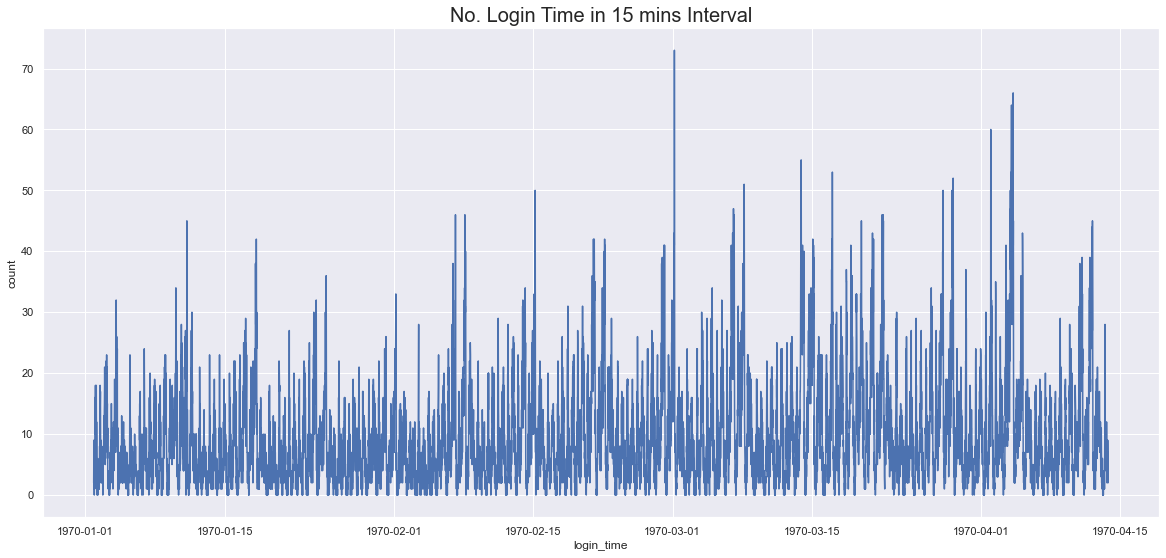

In [32]:
# plot chart - 15 mins time interval
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(20, 9)})

sns.lineplot(x = "login_time",
             y = "count",
             data = agg_df)
plt.title("No. Login Time in 15 mins Interval", fontsize = 20)

Base on the graph below without digging down deeper, we can draw the follow conclusions:
1. the data range from January to April of 2023.
2. there are lots of noise in the data when we observe them from 15 mins interval.
3. it appears that there are some trends in the data, we need to do more digging.

Text(0.5, 1.0, 'No. Login Time in 15 mins Interval')

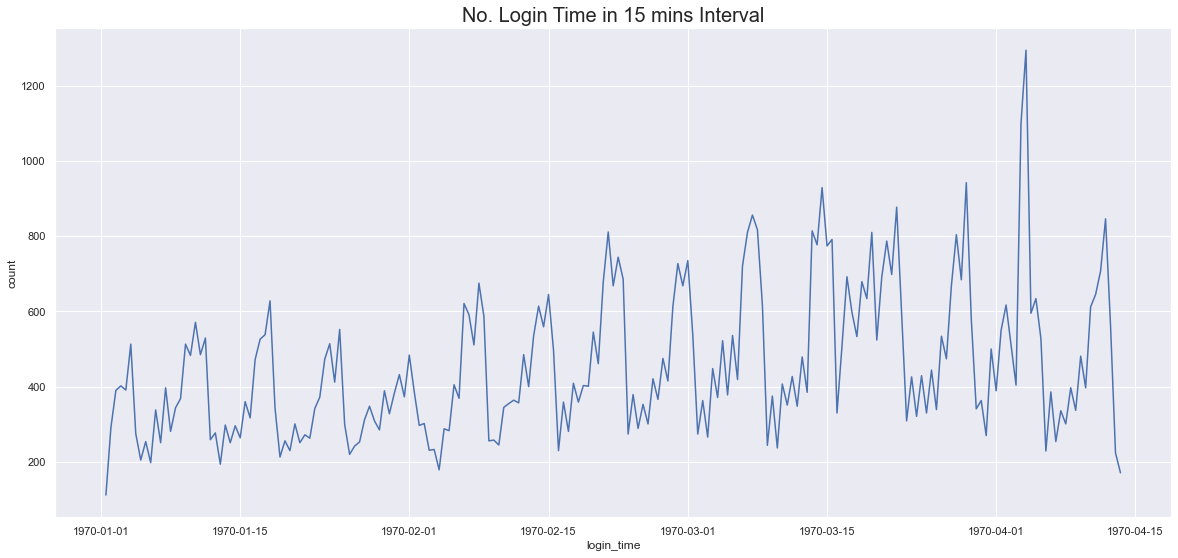

In [43]:
# data - hourly interval
# since we likl
agg_df = pd.DataFrame(df.groupby([pd.Grouper(key='login_time' ,freq='0.5D')]).sum()).reset_index()
agg_df = agg_df.set_index('login_time')
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(20, 9)})

sns.lineplot(x = "login_time",
             y = "count",
             data = agg_df)
plt.title("No. Login Time in 15 mins Interval", fontsize = 20)